### To identify the causes and develop a system to predict heart attacks.

### STEP-1: Preliminary analysis

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [6]:
#import dataset
data = pd.read_excel('cep.xlsx')


In [7]:
#show the data head
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
#shape of the data
data.shape

(303, 14)

In [9]:
#checking the missing value
data.isna().sum(axis=0)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

*There is no null value in the data*


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

In [12]:
data.drop_duplicates(inplace=True)


In [13]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
#Statistical summary of the data
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [15]:
data['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

*96 Female(sex=0), 206 Male(sex=1)*

In [16]:
data['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

*164 person with heart disease and 138 person without heart disease.So. our dataset is balanced*

### Explore/Visualize Dataset

In [17]:
categorical_val = []
continous_val = []
for col in data.columns:
    if len(data[col].unique()) <= 10:
        categorical_val.append(col)
    else:
        continous_val.append(col)


In [18]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

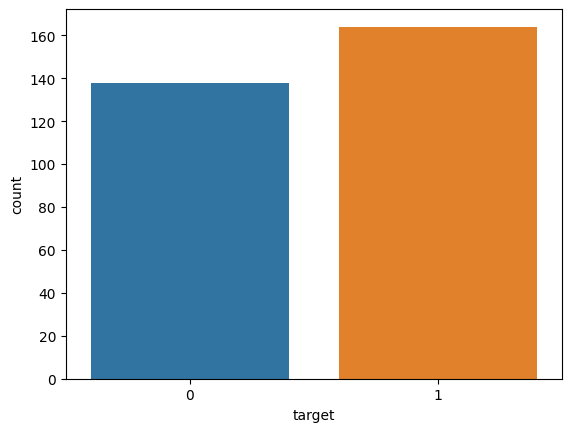

In [19]:
sns.countplot(x=data['target'])
plt.show()

In [20]:
data.corr()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


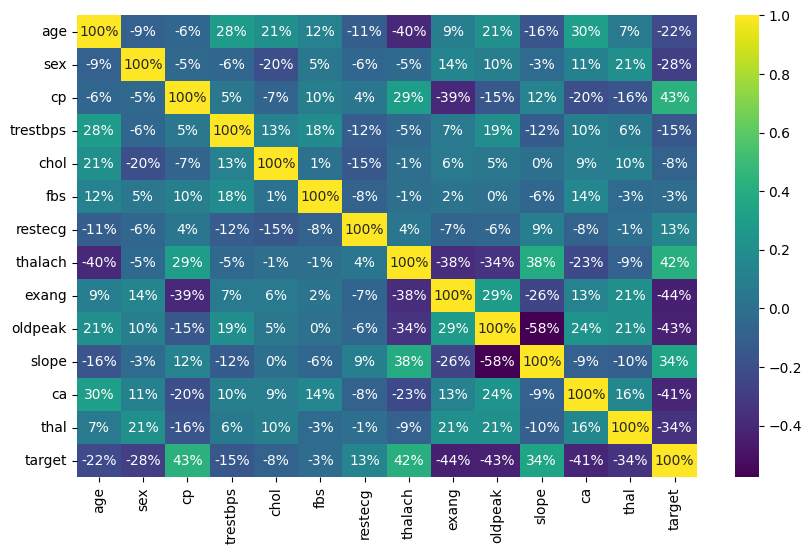

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True,fmt='.0%', cmap = 'viridis')
plt.show()

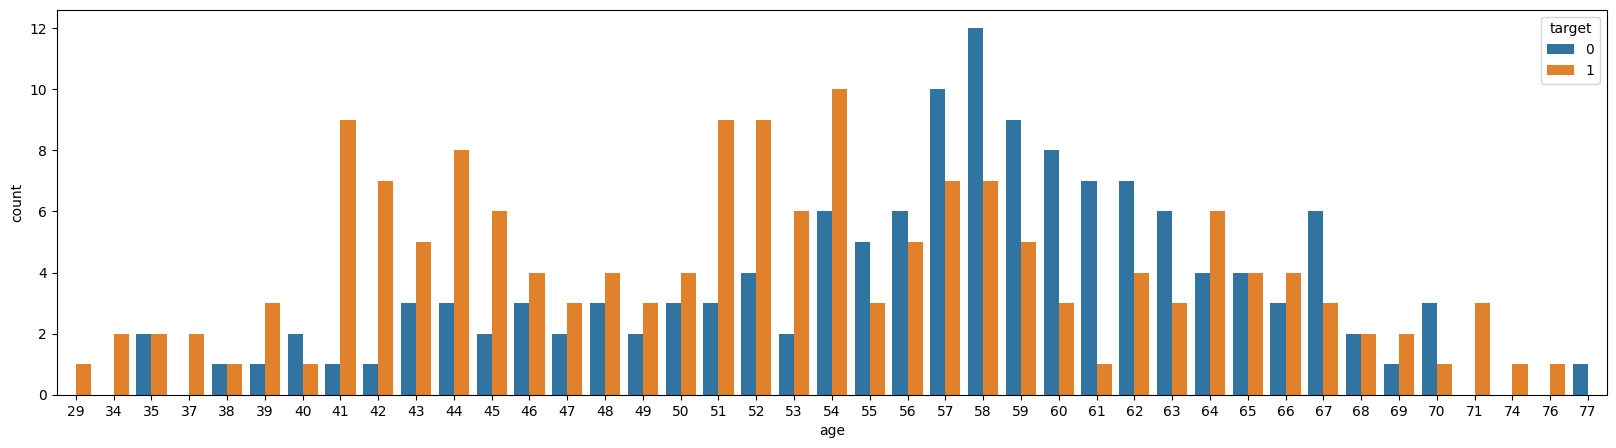

In [22]:
#Plot of heart disease vs age
plt.figure(figsize=(20,5))
sns.countplot(x = 'age', hue = 'target', data=data)
plt.show()

<AxesSubplot:>

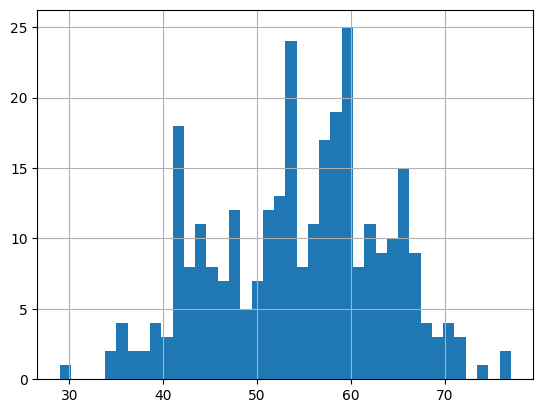

In [23]:
data['age'].hist(bins = 40)

*observation:Age-(41-60) with more heart disease*

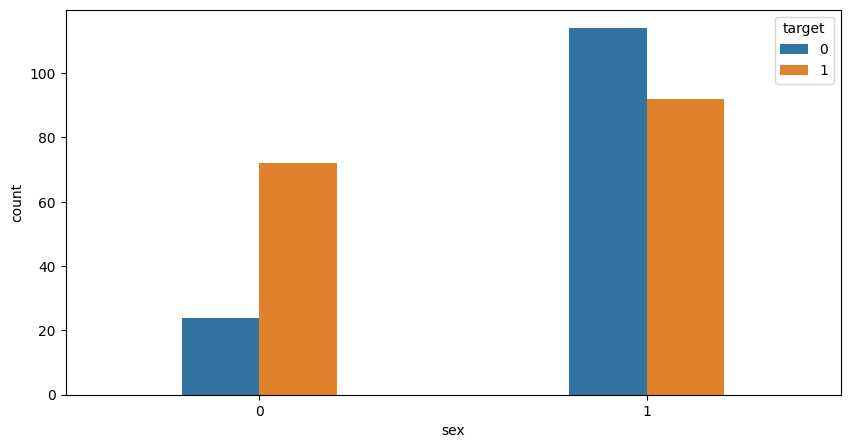

In [24]:
#Plot of heart disease vs sex
plt.figure(figsize=[10,5])
sns.countplot(x = 'sex', hue = 'target',width=0.4, data=data)
plt.show()


*Here, target = 1, with heart disease and target = 0 ,without heart disease.*

*observation:Female(sex=0) with more heart disease, Male(sex= 1) with less heart disease.*

## Now the same analysis will be made on other independent variables

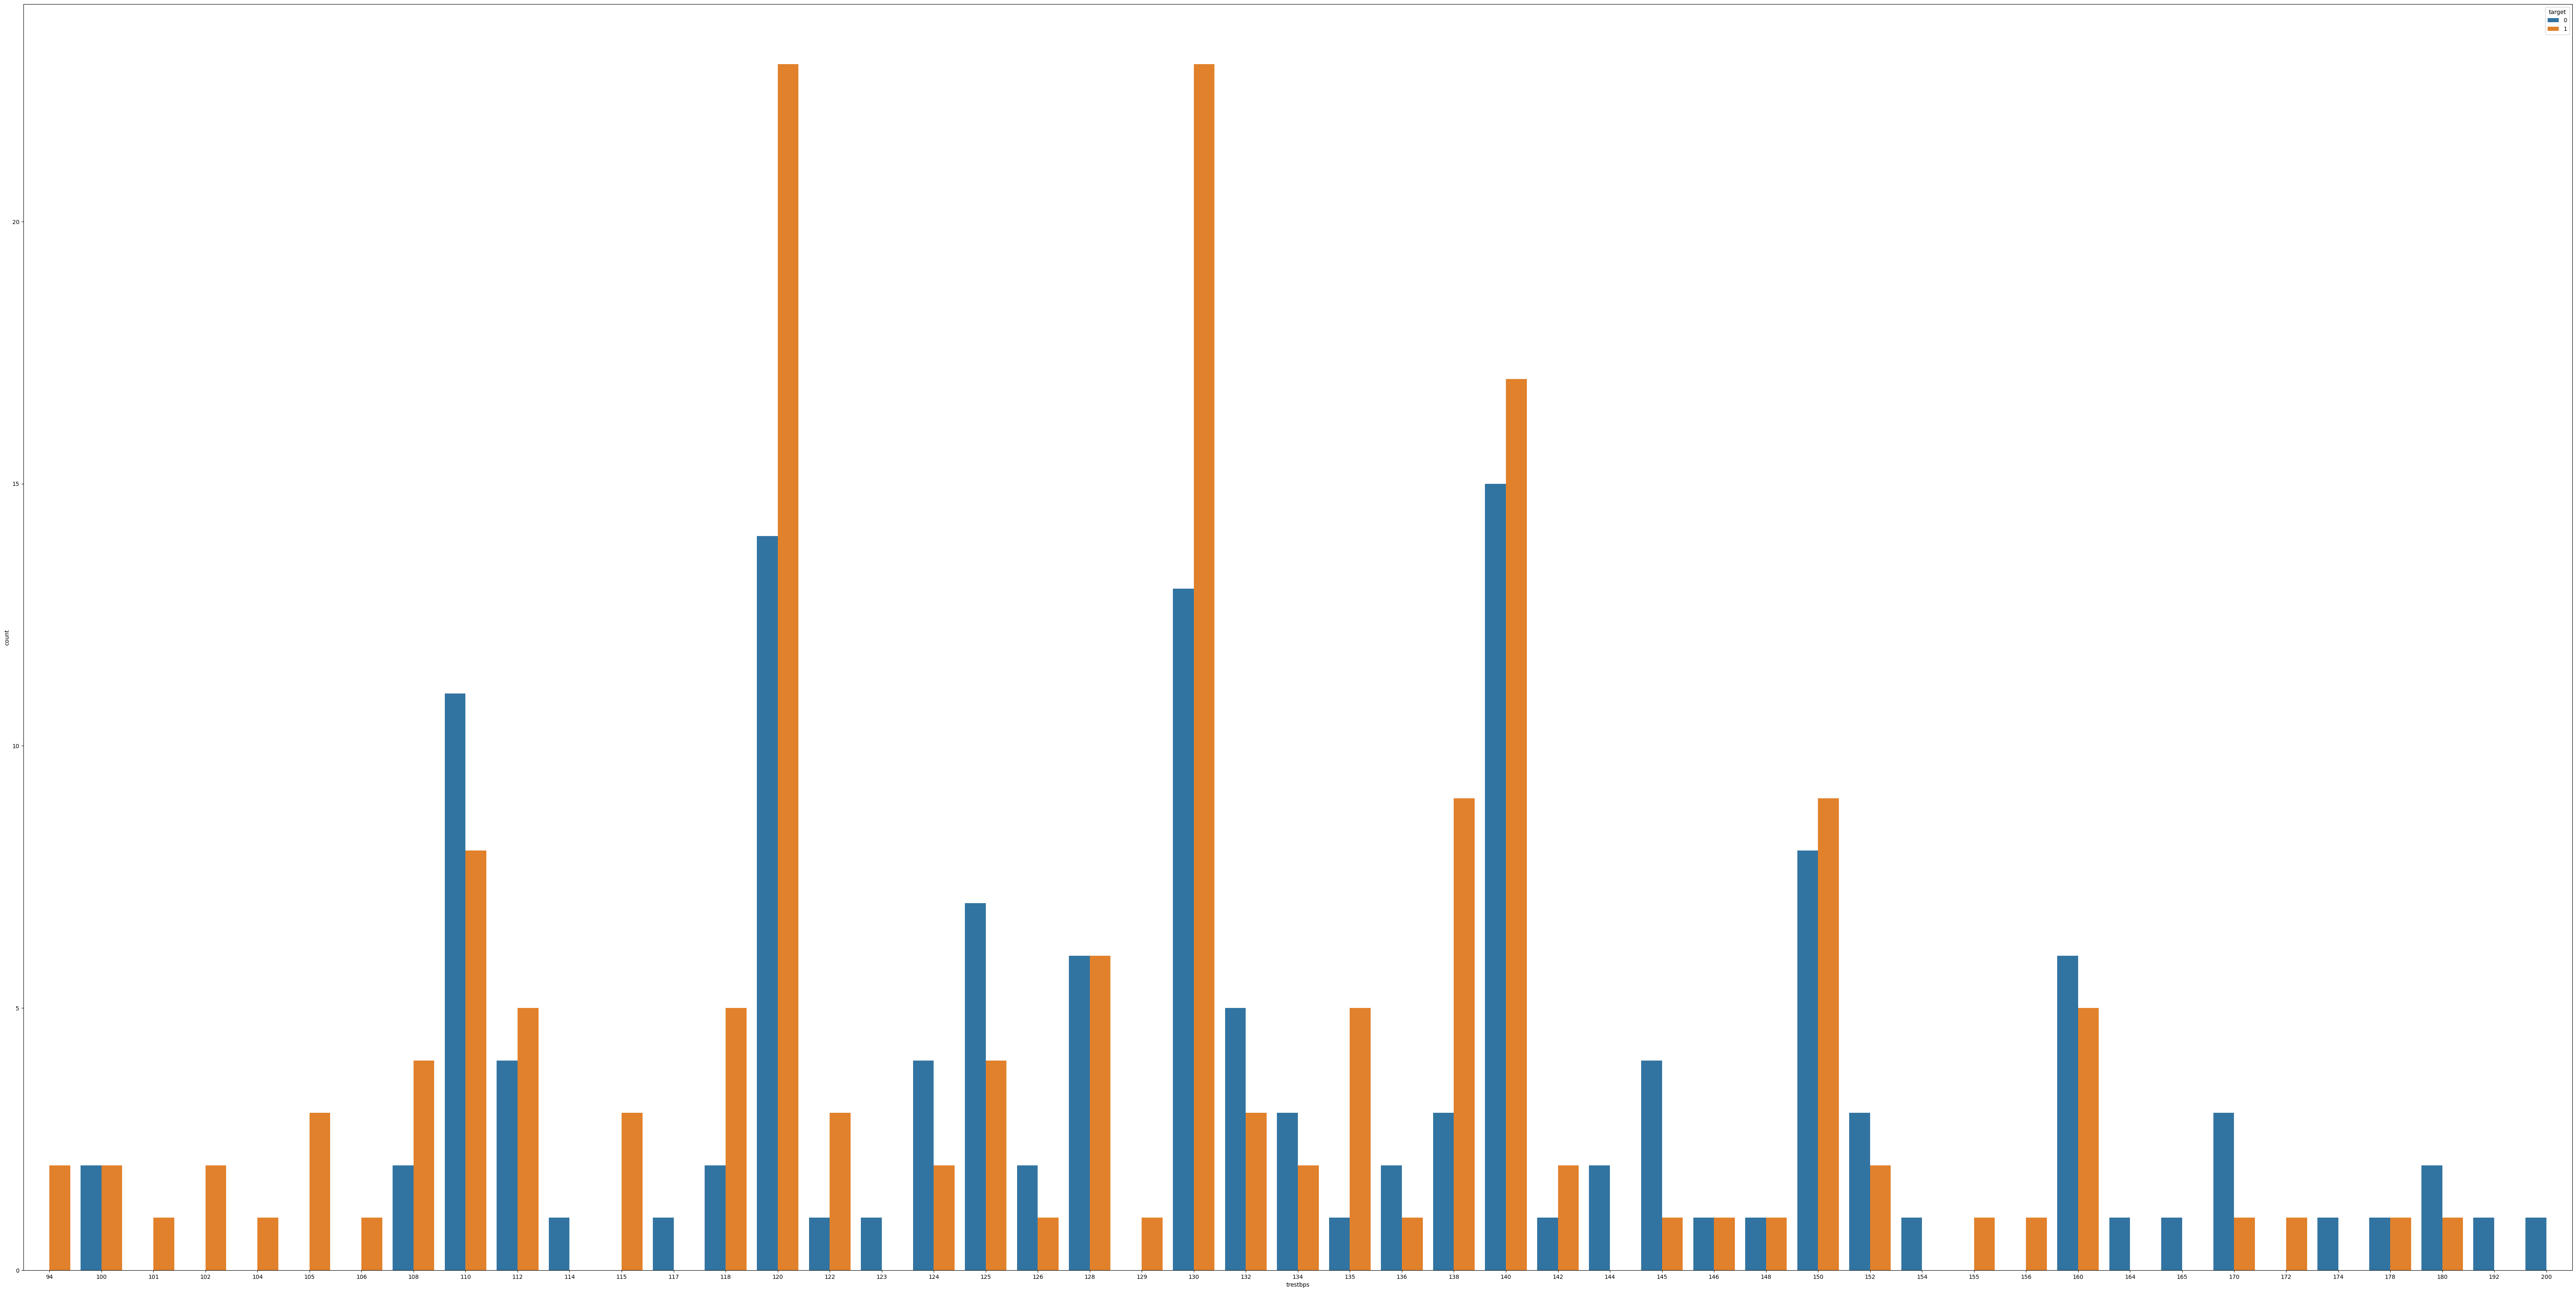

In [25]:
plt.figure(figsize=(80,40))
sns.countplot(x = 'trestbps', hue = 'target', data=data)
plt.show()

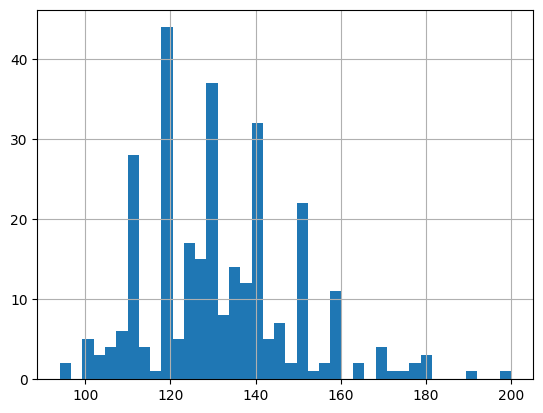

In [26]:
data['trestbps'].hist(bins = 40)
plt.show()

*observation:Low Resting blood pressure(trestbps) results in Heart attack.*

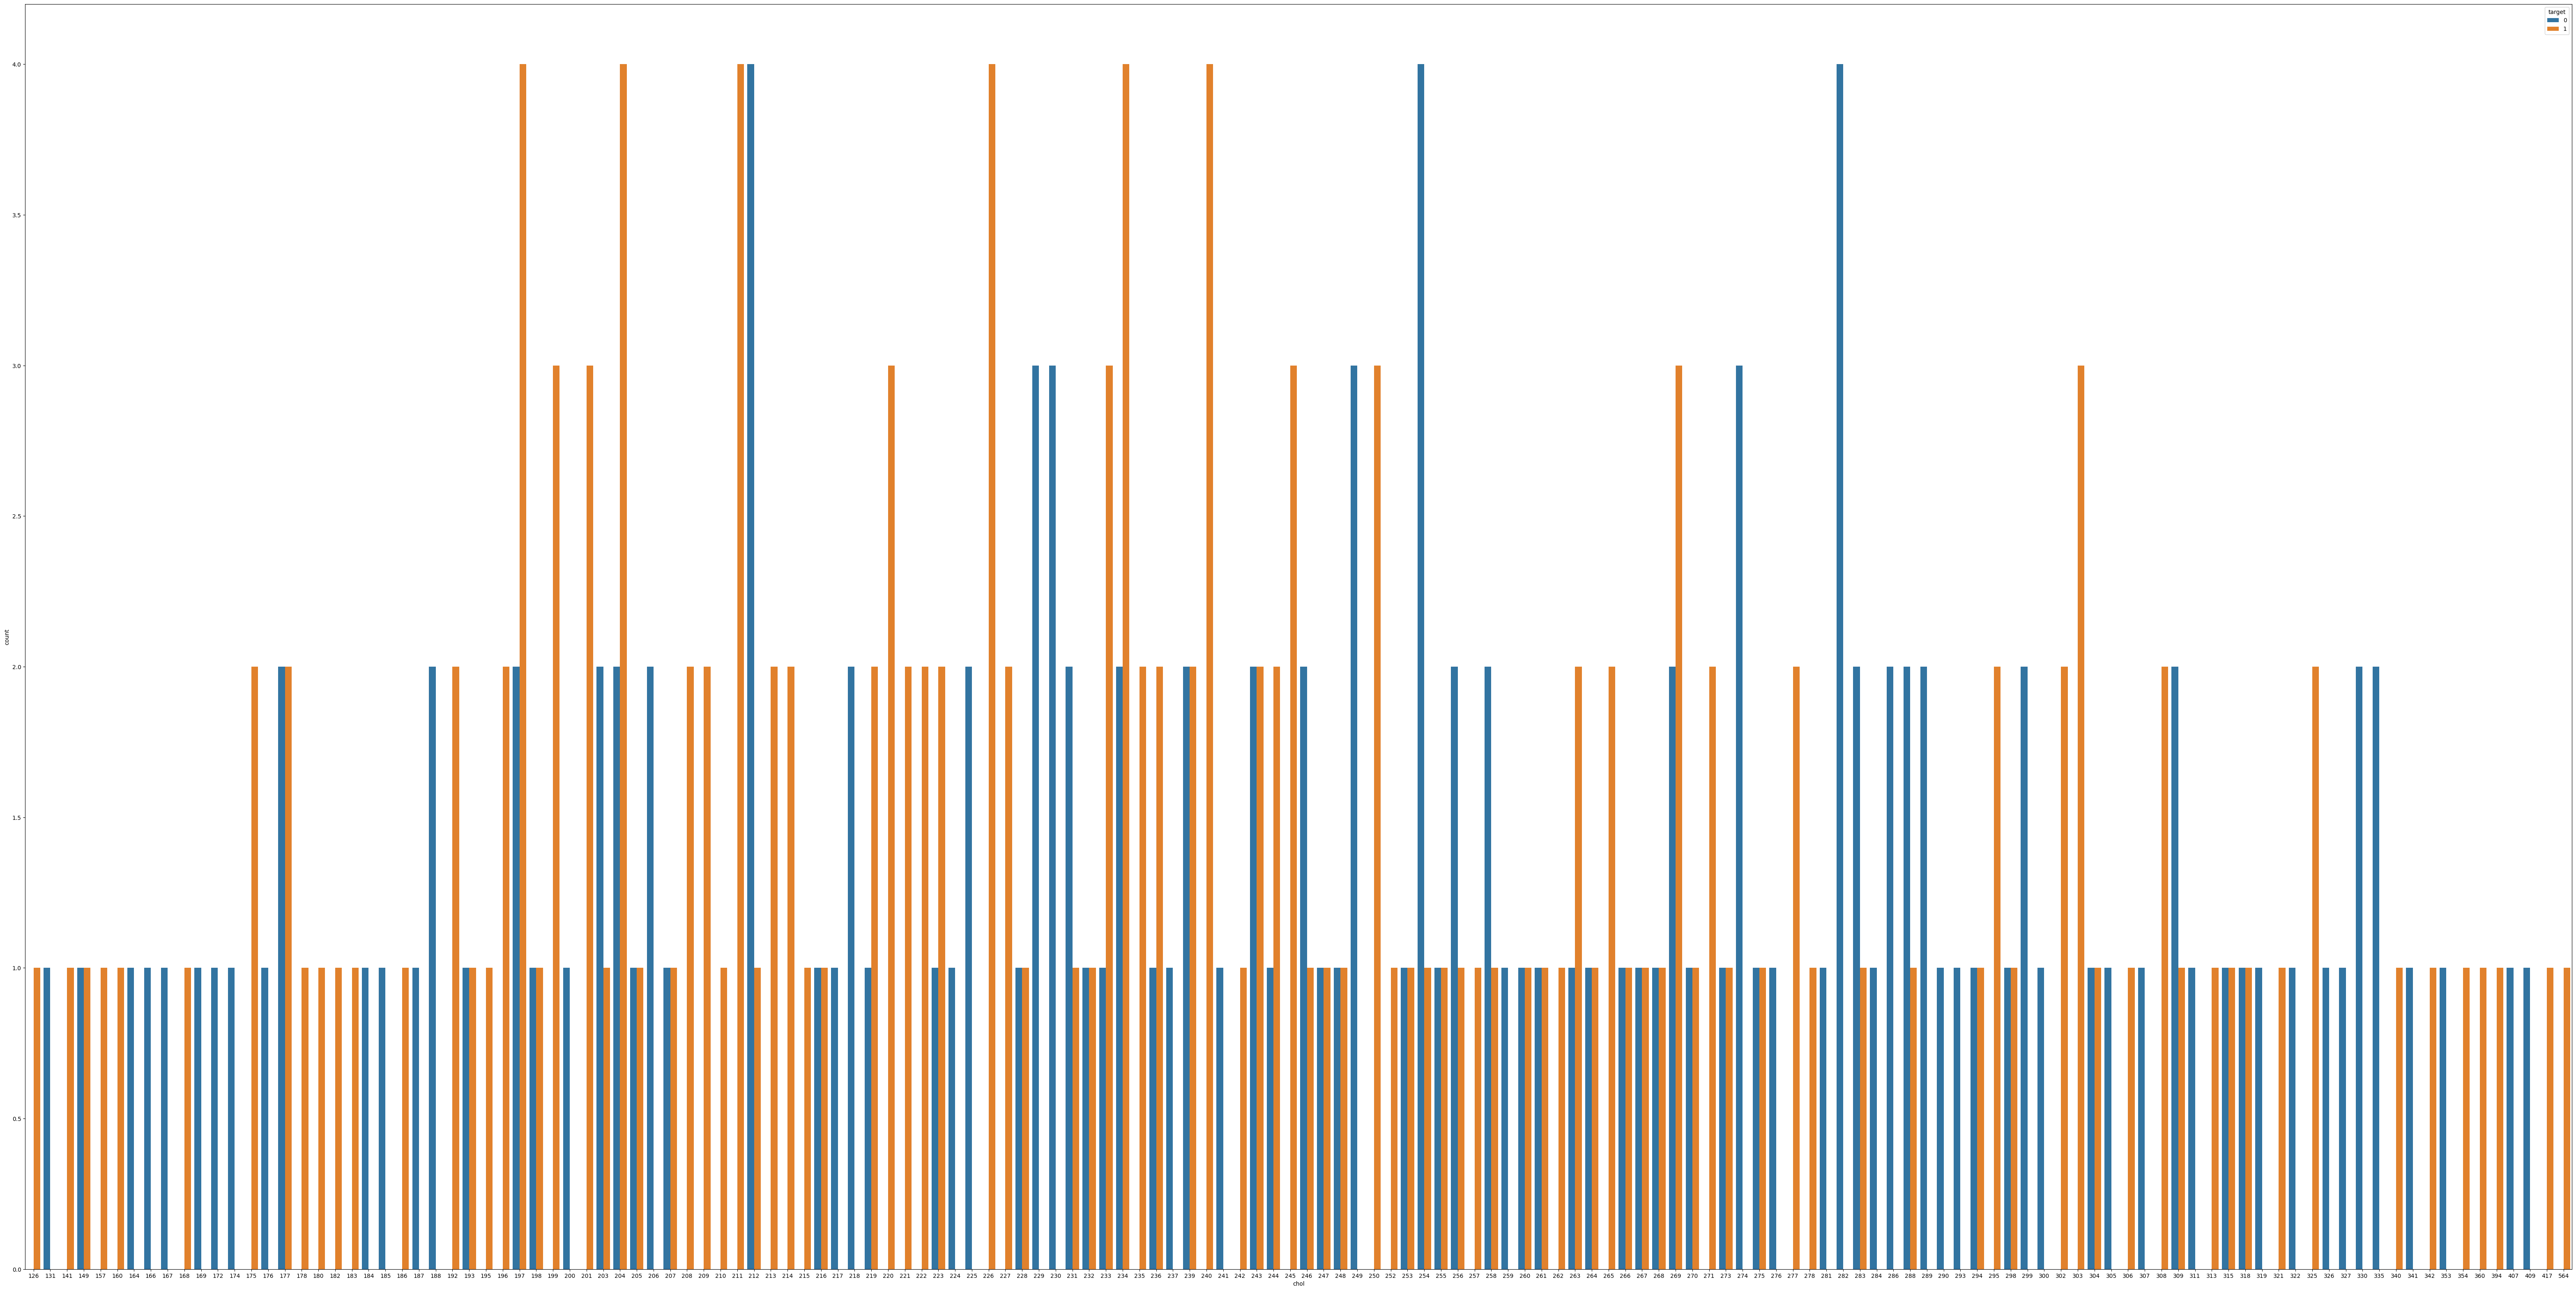

In [27]:
plt.figure(figsize=(80,40))
sns.countplot(x = 'chol', hue = 'target', data=data)
plt.show()

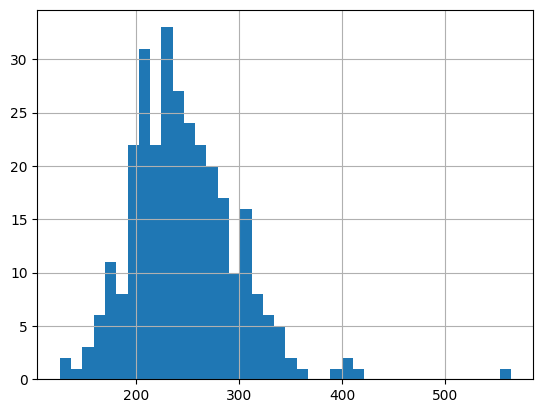

In [28]:
data['chol'].hist(bins = 40)
plt.show()

*observation:People with 210-280 mg/dl Cholesterol result heart disease*

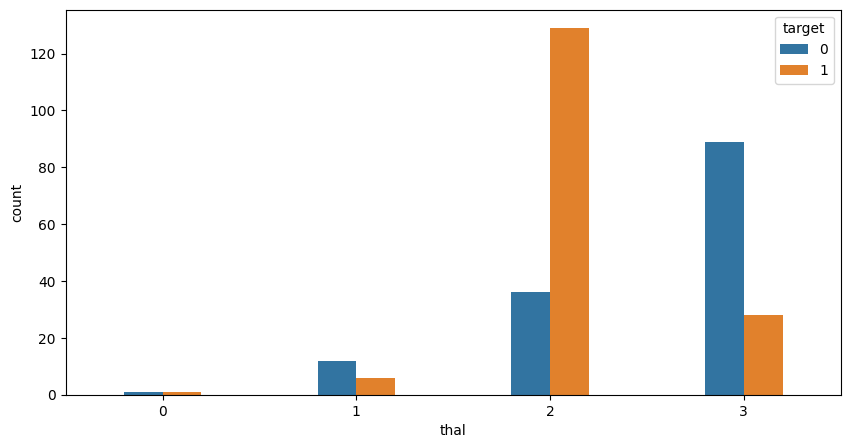

In [29]:
plt.figure(figsize=[10,5])
sns.countplot(x = 'thal', hue = 'target',width=0.4, data=data)
plt.show()


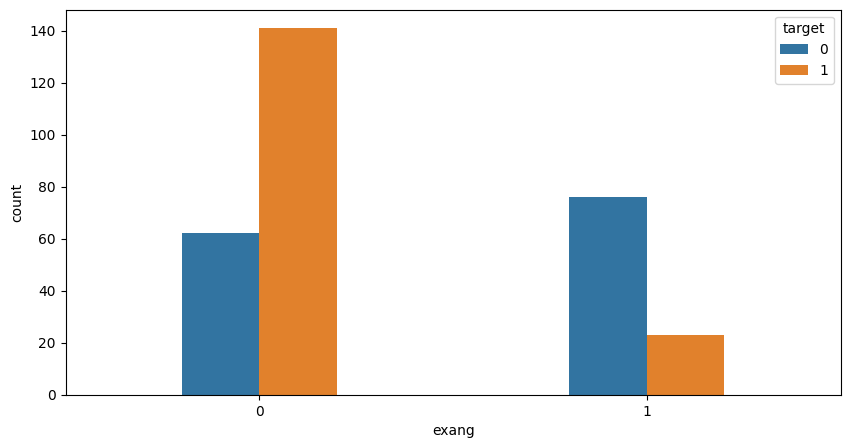

In [30]:
plt.figure(figsize=[10,5])
sns.countplot(x = 'exang', hue = 'target',width=0.4, data=data)
plt.show()


*Peak Excercising result no heart attack.*

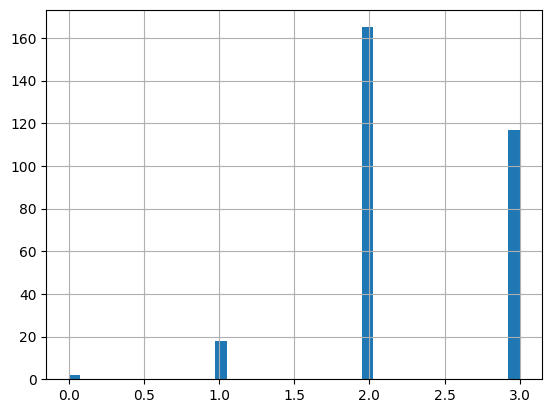

In [31]:
data['thal'].hist(bins = 40)
plt.show()

*thal-2 with more heart diseases*

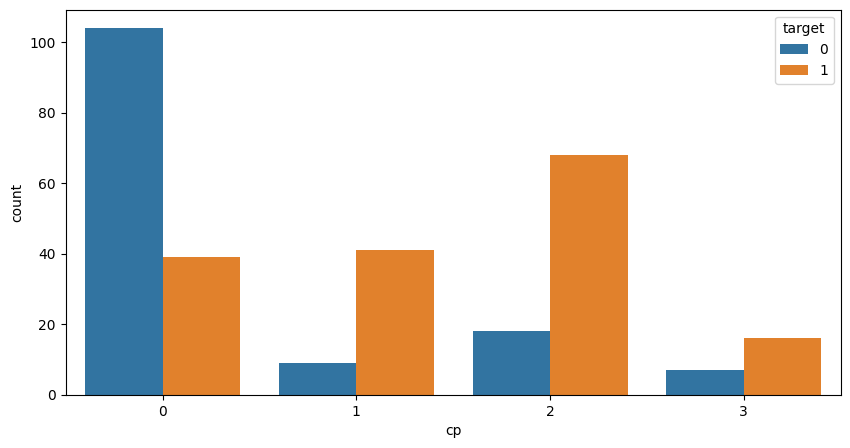

In [32]:
#Heart Diseases vs chest pain
plt.figure(figsize=[10,5])
sns.countplot(x = 'cp', hue = 'target', data=data)
plt.show()


*There are different types of chestpain(cp), cp-0, cp-1, cp-2, cp-3*
*Chest pain'0' has no heart disease compare with chest pain '2' more with heart disease. Hence, The Chest pain of '0' are much less likely to have heart problems.*

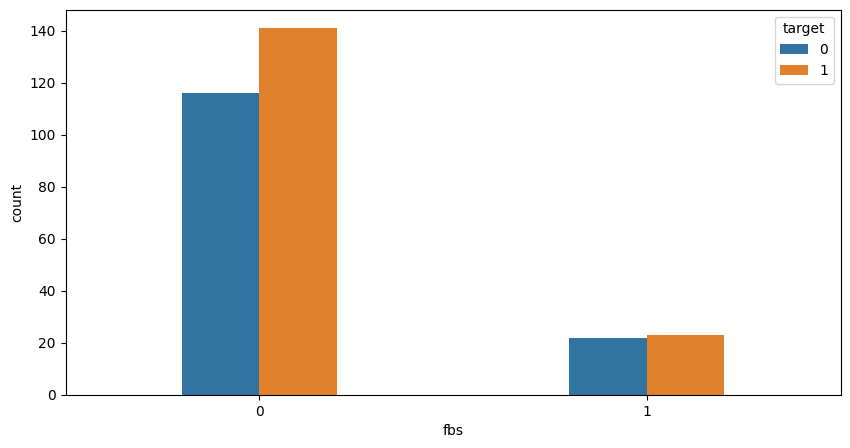

In [33]:
#Heart Disease vs fasting blood sugar
plt.figure(figsize=[10,5])
sns.countplot(x = 'fbs', hue = 'target',width=0.4, data=data)
plt.show()


*Fasting blood sugar > 120mg/dl. Here (0=False, 1=True), Fbs False with heart disease rate high.*

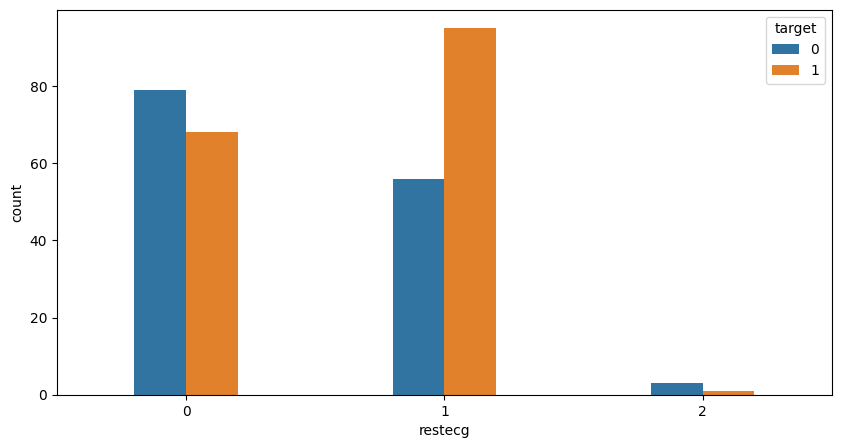

In [34]:
#Heart Disease vs restecg
plt.figure(figsize=[10,5])
sns.countplot(x = 'restecg', hue = 'target',width=0.4, data=data)
plt.show()


*Hence, Resting electrocardiographic '1' results heart diseases.*

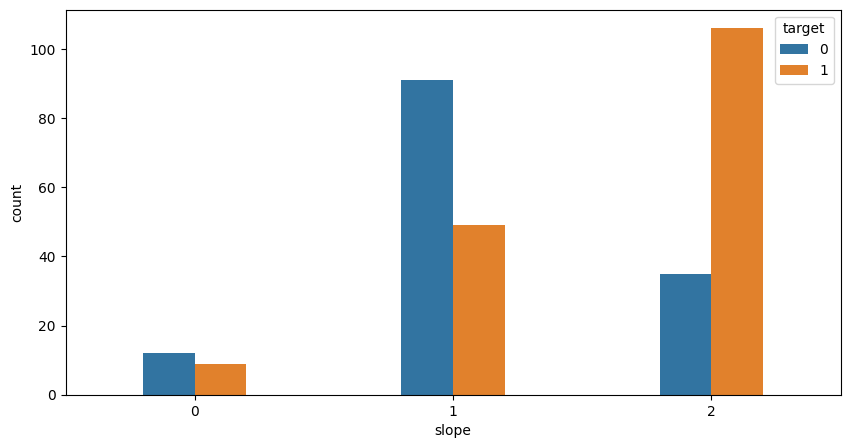

In [35]:
#Heart Disease vs slope

plt.figure(figsize=[10,5])
sns.countplot(x = 'slope', hue = 'target',width=0.4, data=data)
plt.show()


*slope-2 heart disease more compare to slope-1 and slope-0*

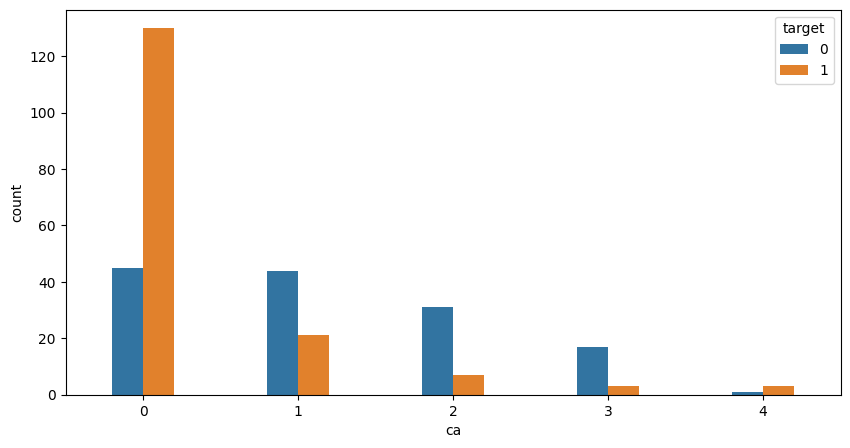

In [36]:
plt.figure(figsize=[10,5])
sns.countplot(x = 'ca', hue = 'target',width=0.4, data=data)
plt.show()


*Number of major vessels (0) colored by fluoroscopy with heart disease more compare to major vessels (1),(2),(3),(4).*

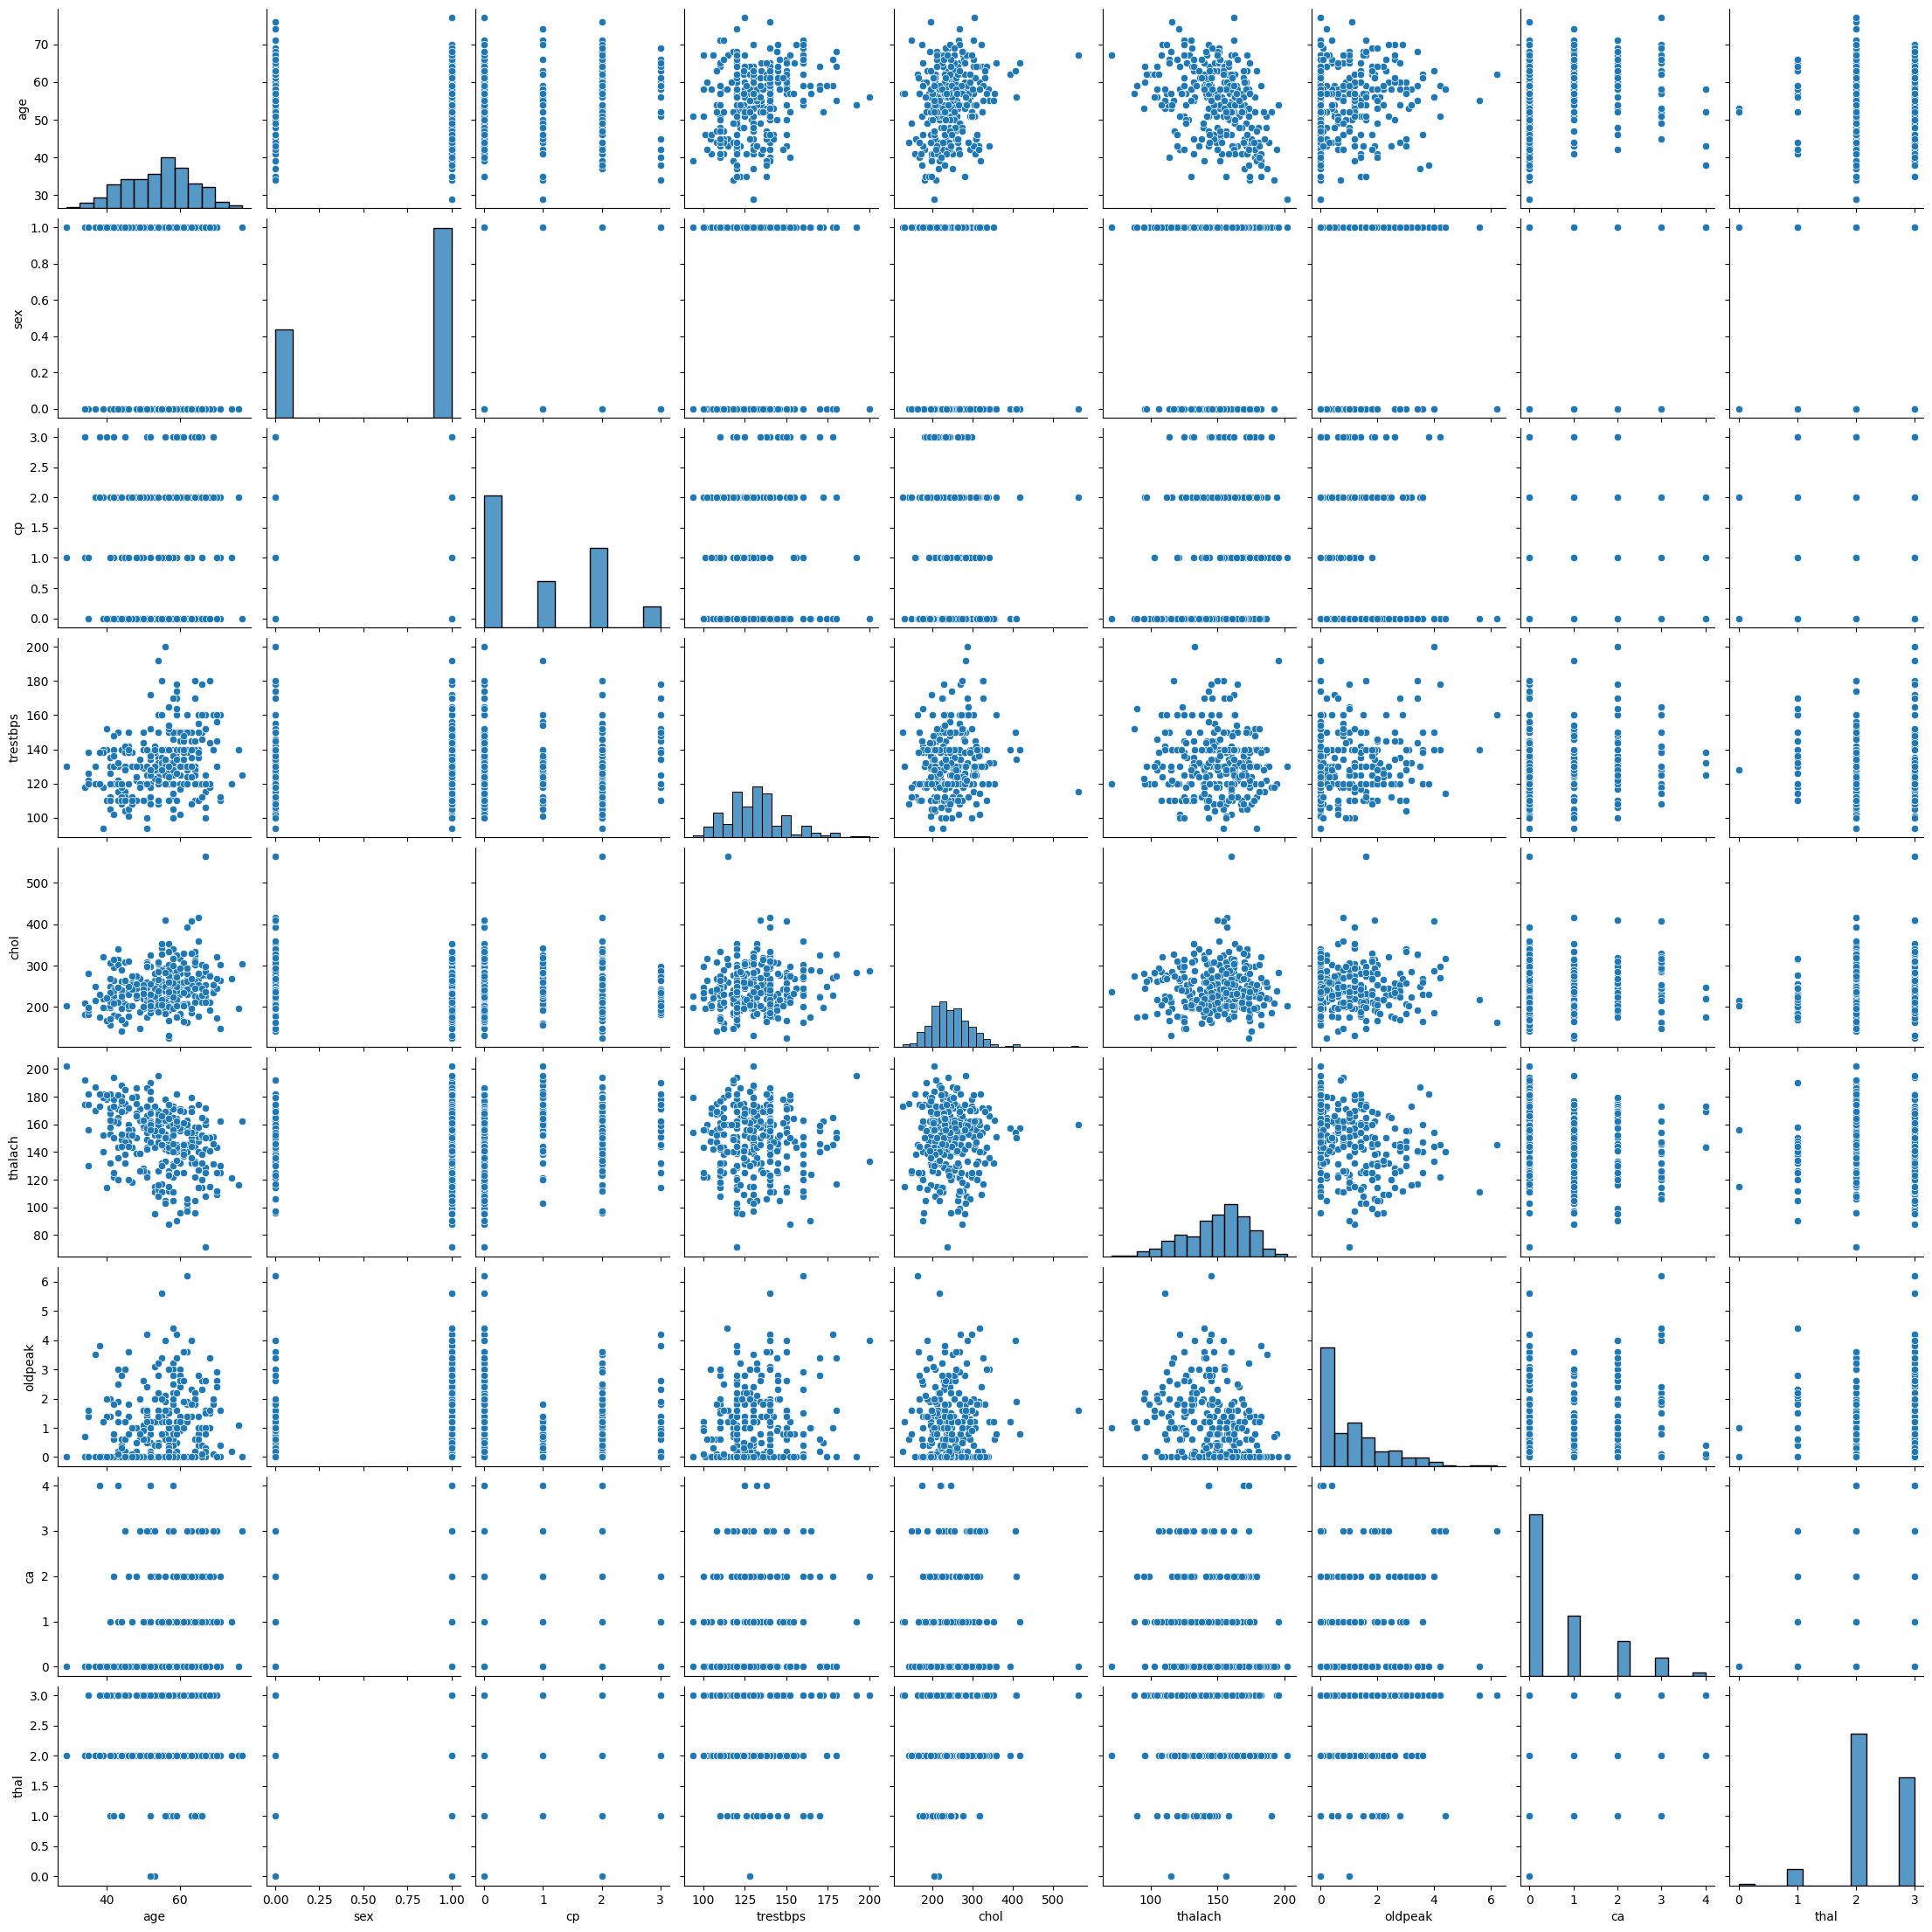

In [33]:
 #Visualizing relations between all major variables
cols = ['age', 'sex', 'cp', 'trestbps','chol','thalach', 'oldpeak', 'ca','thal']

sns.pairplot(data[cols])
plt.show()

### Data Split

In [37]:
X = data.drop('target', axis=1)

In [38]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [39]:
y = data['target']

In [40]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [42]:
print(X.shape,X_train.shape,X_test.shape)

(302, 13) (211, 13) (91, 13)


*Logistic regression is a classification machine learning algorithm which is suitable for binary dependent
variable and provides the output as the probability of being 1. 
We have 2 datasets - train and test. We will build the model on the train data and then test
the model on test to check the accuracy.*


In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
model= LogisticRegression()

In [45]:
#accuracy on training data
model.fit(X_train,y_train).score(X_train,y_train)

0.8672985781990521

### Training Data accuracy: 86%

In [46]:
#accuracy on test data
X_test_prediction = model.predict(X_test)


In [47]:
from sklearn import metrics
test_data_accuracy = metrics.accuracy_score(X_test_prediction, y_test)
print(test_data_accuracy)

0.7802197802197802


### Test Data accuracy: 78%

In [48]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 30)
#no of estimators means tree combining in the forest

In [49]:
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30)

In [50]:
clf.score(X_test, y_test)

0.7912087912087912

In [51]:
y_predicted = model.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm
TN=cm[0][0]
TP=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
#print the model accuracy on Test data
print('Model Test Accuracy = {}'.format((TP+TN)/(TP+TN+FN+FP)))


Model Test Accuracy = 0.7802197802197802


In [53]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_predicted)
acc

0.7802197802197802

In [54]:
from sklearn.model_selection import cross_val_score


In [55]:
cross_val_score(LogisticRegression(),X,y)

array([0.83606557, 0.86885246, 0.86666667, 0.85      , 0.75      ])

In [56]:
cross_val_score(RandomForestClassifier(n_estimators = 30),X,y)

array([0.83606557, 0.85245902, 0.78333333, 0.78333333, 0.75      ])

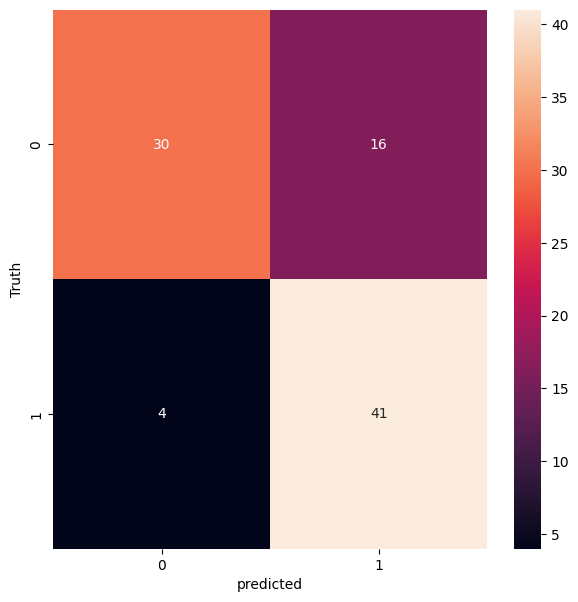

In [57]:
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')
plt.show()


### From the above case,we can say the  accuracy of the random forest classifier and logistic regression is fairly well.

In [58]:
#Building a predictive system
input_data = (57,0,0,120,354,0,1,163,1,0.6,2,0,2)
input_data_numpy_array = np.asarray(input_data)
input_data_reshape = input_data_numpy_array.reshape(1,-1)
prediction = clf.predict(input_data_reshape)
print(prediction)
if (prediction[0]==0):
    print('The person does not have heart disease')
else:
    print('The person has heart disease')


[1]
The person has heart disease


In [59]:
input_data1 = (57,1,0,130,131,0,1,115,1,1.2,1,1,3)
input_data_numpy_array = np.asarray(input_data1)
input_data_reshape = input_data_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshape)
print(prediction)
if (prediction[0]==0):
    print('The person does not have heart disease')
else:
    print('The person has heart disease')

    

[0]
The person does not have heart disease
